## Homework 2
### Due: Thursday Feb. 13

**Integer vs floating point number**

Write a program to calculate and print the factorial of a
number.  If you wish you can base your program on the
user-defined function for factorial given in Section 2.6, but write your
program so that it calculates the factorial using *integer*
variables, not floating-point ones.  Use your program to calculate the
factorial of 200.

Now modify your program to use floating-point variables instead and again
calculate the factorial of 200.  What do you find?  Explain.

(20 points)

In [45]:
# code
def integer_factorial(x):
    output = 1
    for k in range(2, x+1):
        output *= k

    return output

print(integer_factorial(200))
print(integer_factorial(20))
print(integer_factorial(5))

def float_factorial(x):
    output = 1.0
    for k in range(2, x+1):
        output *= k

    return output

print("\nnow using floating point numbers:\n")
print(float_factorial(200))
print(float_factorial(20))
print(float_factorial(5))

print("\n\tIt seems that the integer calculation allows for a more exact calculation (but I don't think it's fully correct).")
print("The floating point calculation simply outputs infinity, which I assume happens after the number is sufficiently large.")

788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000
2432902008176640000
120

now using floating point numbers:

inf
2.43290200817664e+18
120.0

	It seems that the integer calculation allows for a more exact calculation (but I don't think it's fully correct).
The floating point calculation simply outputs infinity, which I assume happens after the number is sufficiently large.


**A Simple Derivative**

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:


${d f\over d x} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.$


On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.
- Write a program that defines a function *f(x)* returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  Calculate
  the true value of the same derivative analytically and compare with the
  answer your program gives.  The two will not agree perfectly.  Why not?
- Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  You should see that the accuracy
  of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

(20 points)

In [44]:
# code

def derivative(function, x, delta):
    return (function(x + delta) - function(x)) / delta

def f_2(x):
    return x * (x-1)

for k in range(1, 8):
    print(derivative(f_2, 1, 10**(-k*2)))

print("\n\tThe analytical result of the derivative is (2x - 1), where x = 1, so it evaluates to 1.  The program disagrees when")
print("the delta is only 10^-2 because it is large enough that it does not mathematically approximate an infinitesimal")
print("quantity well.")

print("\n\tThe reason that the results get worse when delta is very small is because the difference between the two points")
print("becomes a very small number, which is then effectively multiplied by a large value, thus the small error is")
print("proportionally larger.")

1.010000000000001
1.0000999999998899
1.0000009999177333
1.0000000039225287
1.000000082840371
1.0000889005833413
0.9992007221626509

	The analytical result of the derivative is (2x - 1), where x = 1, so it evaluates to 1.  The program disagrees when
the delta is only 10^-2 because it is large enough that it does not mathematically approximate an infinitesimal
quantity well.

	The reason that the results get worse when delta is very small is because the difference between the two points
becomes a very small number, which is then effectively multiplied by a large value, thus the small error is
proportionally larger.


### Simpson's Rule

- Write a program to calculate an approximate value for the integral $\int_{0}^{2} ( x^4 - 2x + 1)dx$ from Example 5.1 in the book, but using Simpson's rule with 10 slices instead of the trapezoid rule. You may be able to modify your code from the trapezoid rule to complete this task. Compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

- Copy your code and modify it to use one hundred slices, then one thousand. Note the improvement in the result and compare to the results from the trapezoid rule.

(30 points)

In [43]:
# code
import numpy as np

def f_1(x):
    return x**4 - 2*x + 1

def AdaptiveSimpSum(function, a, b, N_steps = 10, tolerance = 0.0001, recursing = True, last_total = 0):
    h = (b-a) / N_steps
    total_T, total_I = 0, 0
    if last_total == 0:
        total_S = (1/3) * (function(a) + function(b))
        for k in range(2, N_steps-1, 2):
            total_S += (2/3) * function(a + k*h)
    else:
        total_S = last_total

    for k in range(1, N_steps, 2):
        total_T += (2/3) * function(a + k*h)

    total_I = h * (total_S + 2*total_T)

    if recursing == True:
        simp_error = np.abs(total_I - AdaptiveSimpSum(function, a, b, N_steps=2*N_steps, recursing=False)) / 15
        #print(f"{N_steps} steps, error: {simp_error}")
        
        if simp_error >= tolerance:
            total_I = AdaptiveSimpSum(function, a, b, N_steps=2*N_steps, tolerance=tolerance, recursing=True, last_total=(total_S + total_T))

    return total_I

print(AdaptiveSimpSum(f_1, 0, 2, N_steps=10, recursing=False))
print(AdaptiveSimpSum(f_1, 0, 2, N_steps=100, recursing=False))
print(AdaptiveSimpSum(f_1, 0, 2, N_steps=1000, recursing=False))

def AdaptiveTrapSum(function, a, b, N_steps = 10, tolerance = 0.0001, recursing = True, step_skip = 1, last_total = 0):
    h = (b-a) / N_steps
    if last_total == 0:
        total = 0.5*h * (function(a) + function(b))
    else:
        total = last_total

    for k in range(1, N_steps, step_skip):
        total += h * function(a + k*h)

    if recursing == True:
        trap_error = np.abs(total - AdaptiveTrapSum(function, a, b, N_steps=2*N_steps, recursing=False)) / 3
        #print(f"{N_steps} steps, error: {trap_error}")
        
        if trap_error >= tolerance:
            total = AdaptiveTrapSum(function, a, b, N_steps=2*N_steps, tolerance=tolerance, recursing=True, step_skip=2, last_total=total/2)

    return total

print("\nNow using just the trapezoid sum\n")
print(AdaptiveTrapSum(f_1, 0, 2, N_steps=10, recursing=False))
print(AdaptiveTrapSum(f_1, 0, 2, N_steps=100, recursing=False))
print(AdaptiveTrapSum(f_1, 0, 2, N_steps=1000, recursing=False))

print("\n\tAs you can see, the trapezoid sum with 100 steps is not even as good as Simpson's Rule with 10 steps.")
print("Additionally, the error on Simpson's Rule decreases faster per step increase than does the trapezoid sum.")



4.400426666666667
4.400000042666668
4.400000000004266

Now using just the trapezoid sum

4.506560000000001
4.401066655999999
4.400010666665598

	As you can see, the trapezoid sum with 100 steps is not even as good as Simpson's Rule with 10 steps.
Additionally, the error on Simpson's Rule decreases faster per step increase than does the trapezoid sum.


### An Integral With No Analytic Solution

Consider the integral

$$ E(x) = \int_{0}^{x} \exp{-t^2} dt$$

- Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

- When you are convinced your program is working, extend it further to make a graph of E(x) as a function of x.

(30 points)

Text(0.5, 1.0, 'E(x)')

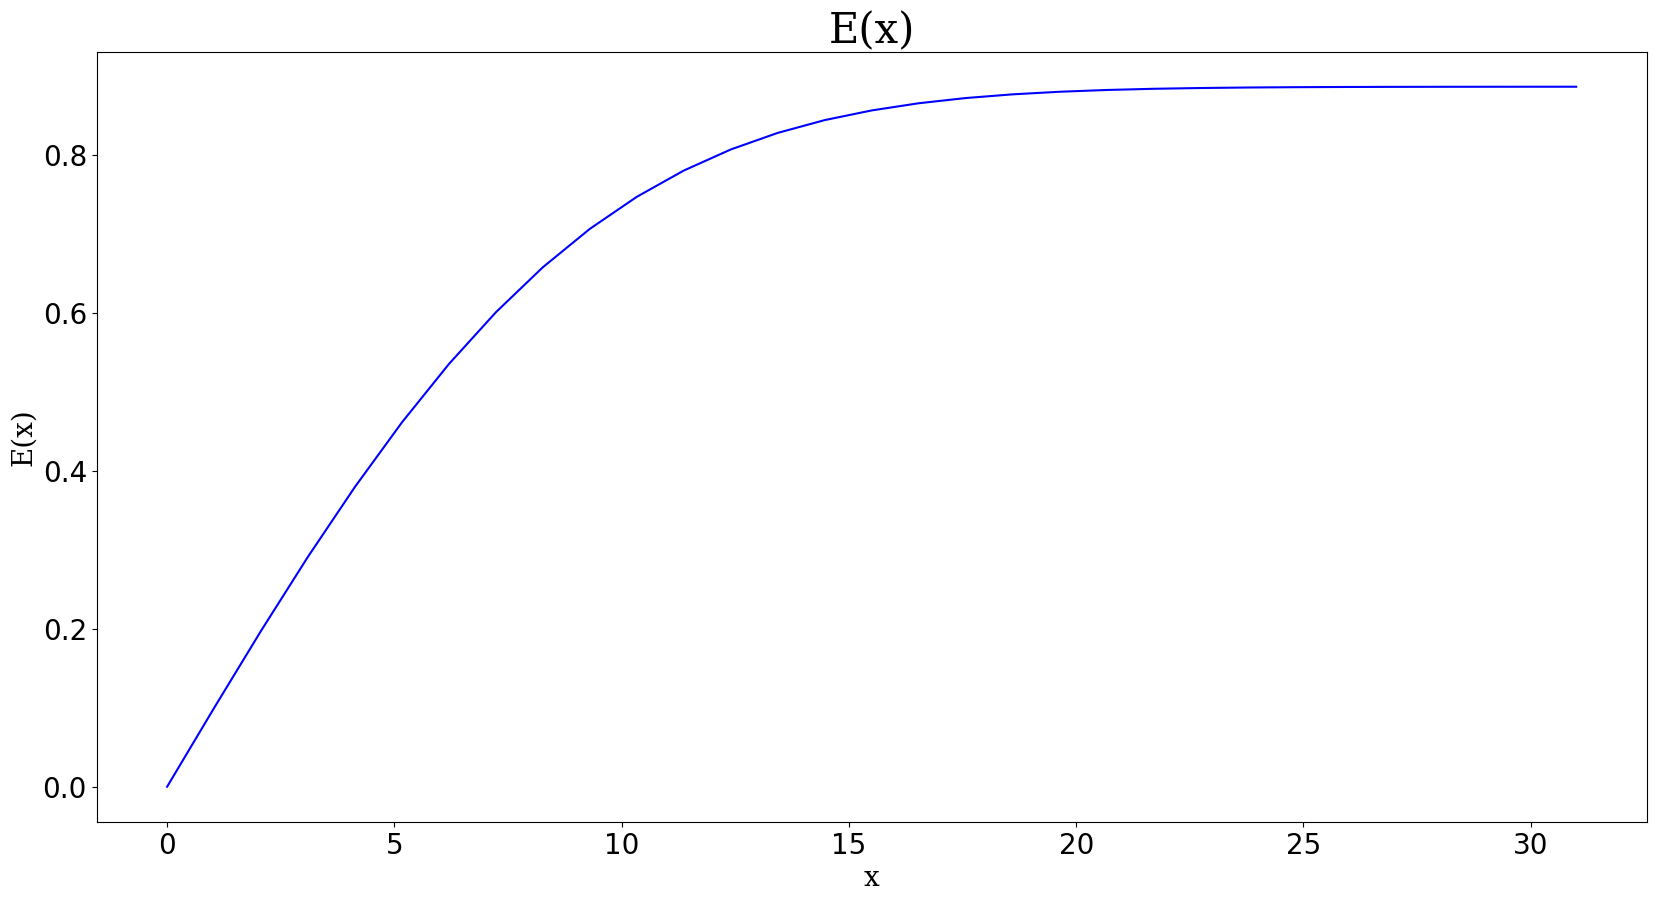

In [ ]:
# code
import matplotlib.pyplot as plt

def f_3(t):
    return (np.e)**-(t**2)

E_values = np.zeros(31)

for k in range(0, 31):
    E_values[k] = AdaptiveSimpSum(f_3, 0, k/10) # default N_steps = 10, it will increase steps until the error is less than default tolerance = 0.0001
    # I didn't figure we need a super small tolerance since we're just making a graph

x_axis = np.linspace(0, 31, 31)

fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.plot(x_axis,E_values,c='b',alpha=1.0)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
LabelFont = {'family':'serif','color':'black','size':20}
TitleFont = {'family':'serif','color':'black','size':30}
plt.xlabel("x", fontdict = LabelFont)
plt.ylabel("E(x)", fontdict = LabelFont)
plt.title("E(x)", fontdict = TitleFont)